In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

foldername = '../Case1/Block Output/blockoutput-'

In [10]:
time = 200
flag = 1

try:
    filename = foldername + str(time) + '.000000'
    file = open(filename, 'r')
    flag = 2
except:
    try:
        filename = foldername + str(time*10).zfill(4)
        file = open(filename, 'r')
        flag = 3
    except:
        print('File not found.')
        flag = 0

if flag:
    count=0
    for lines in file:
        count+=1

        if count==1:
            print(lines)
            if lines[10]==',':
                strings = lines.split(',')
                nvirions_index = strings.index('dpm-concentration,')
            elif lines[10]==' ': 
                strings = lines.split()
                nvirions_index = strings.index('dpm-concentration')
            
            print(strings[nvirions_index] + ' found.')
            print('Good to go.')


nodenumber     x-coordinate     y-coordinate     z-coordinate         pressure dynamic-pressure absolute-pressure   total-pressure          density velocity-magnitude       x-velocity       y-velocity       z-velocity total-temperature dpm-concentration  dpm-mass-source num-virions-inhaled prob_infection-x100 prob_infection_1min-x100 

dpm-concentration found.
Good to go.


In [4]:
nvirions_array=[]

for time in range(1,601):

    if flag==2:
        filename = foldername + str(time) + '.000000'
    elif flag==3:
        filename = foldername + str(time*10).zfill(4)
        
    file = open(filename, 'r')

    count=0
    points=0
    nvirions=0
    for lines in file:
        count+=1
        if count>2:
            # vals = lines.split(',')
            vals = lines.split()
            xcoord = float(vals[1])
            ycoord = float(vals[2])
            zcoord = float(vals[3])

            if ycoord<1.5:
                # print(ycoord)
                # if xcoord>2 and xcoord<3:
                #     if zcoord>2 and zcoord<3:
                if xcoord>2.585 and xcoord<2.615:
                    if zcoord>2.28 and zcoord<2.3:
                        points+=1
                        # print(points,xcoord,zcoord,float(vals[-2]),float(vals[-3]))
                        try:
                            nvirions+=float(vals[-7])
                            # nvirions+=float(vals[-6])
                        except:
                            nvirions+=0

    print(time,nvirions)
    nvirions_array.append([time,nvirions])

1 0.0
2 0.0
3 0.0061874971326999996
4 0.1125460756797
5 0.1125460756797
6 0.1141462259397
7 0.1141462259397
8 0.1141503791345545
9 0.121391412380214
10 0.12555524294003398
11 0.15817838583544
12 0.25675172578884004
13 0.5736271158046999
14 0.6030491493489
15 0.7780245441527001
16 0.8197788859727
17 1.7102381911728002
18 2.1040303583838
19 2.3007946332838
20 2.3007946332838
21 2.3018622456538
22 2.3018622456538
23 2.3213796394478
24 2.3213796394478
25 2.3213796394478
26 2.3213796394478
27 2.3213796394478
28 2.3231710679477997
29 13.203997440520498
30 13.203997440520498
31 1425.8329268602665
32 3475.811576647159
33 8354.740563136464
34 10608.703580140715
35 12167.256945997591
36 14555.166891208686
37 16035.067989588742
38 18680.584388450363
39 19664.784766763423
40 36480.49708006799
41 40023.4651067853
42 43764.068499621986
43 48515.24612872018
44 53910.26355044994
45 55942.55611698745
46 58310.65361653767
47 60657.03295206622
48 63852.06327865362
49 67680.0492502904
50 69417.76806934882

In [3]:
nvirions_array = np.array(nvirions_array)
time = nvirions_array[:,0]
N = nvirions_array[:,1]*39

NameError: name 'nvirions_array' is not defined

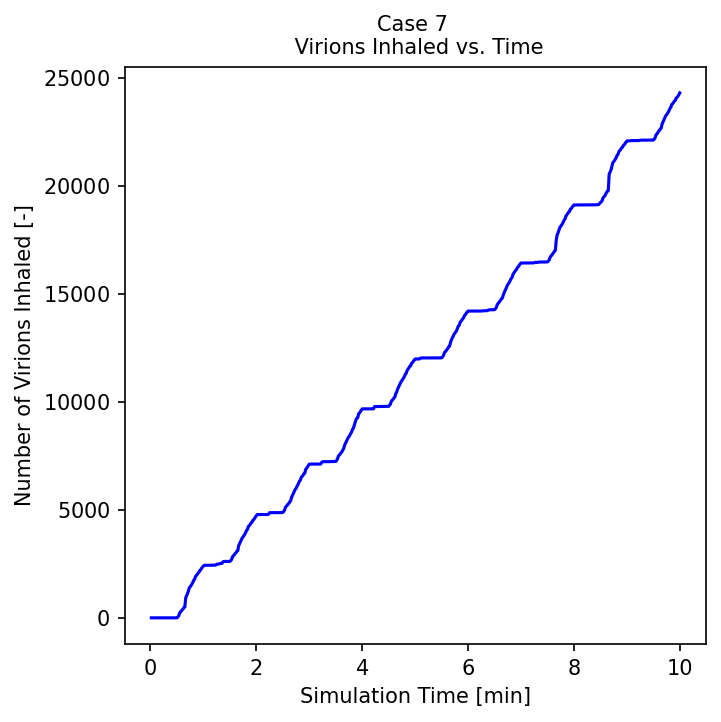

In [38]:
fig,ax = plt.subplots(num=2, figsize=(5,5),dpi=150)
p = ax.plot(time/60,N,'b',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Number of Virions Inhaled [-]')
plt.title('Case 7 \n Virions Inhaled vs. Time', fontsize=10)
plt.savefig('../Case7/Virions Inhaled Sampling/nvirions2.jpg')

In [32]:
d = N/16000

# k = 410
k=410
power = -1/k * d
P = 1 - np.exp(power)

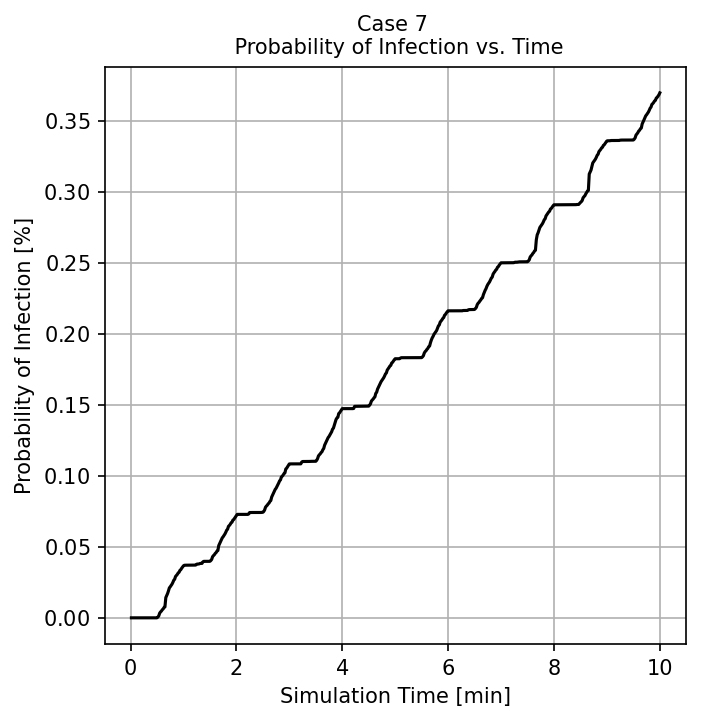

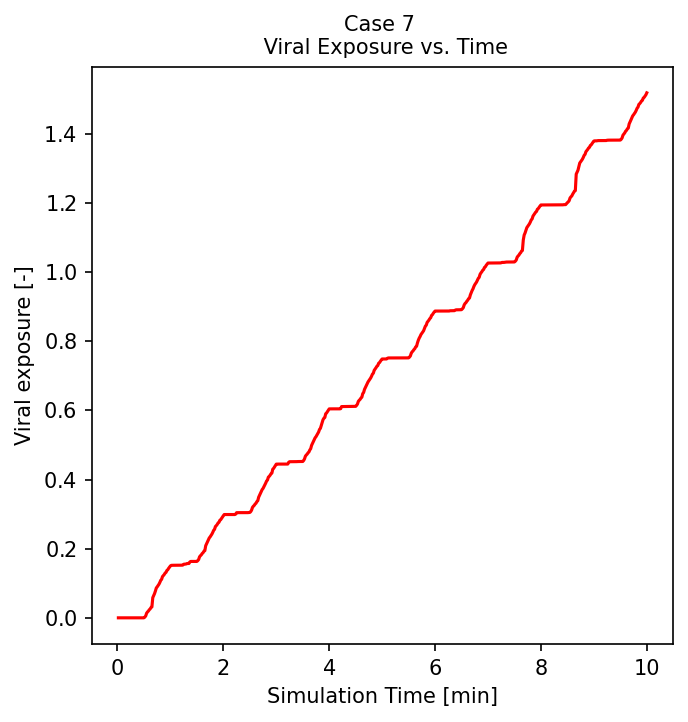

In [34]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(time/60,P*100,'k',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.title('Case 7 \n Probability of Infection vs. Time', fontsize=10)
# plt.minorticks_on()
plt.grid(which='major')
# plt.grid(which='minor',linestyle=':')
plt.savefig('../Case7/Virions Inhaled Sampling/prob2.jpg')

fig,ax = plt.subplots(num=3, figsize=(5,5),dpi=150)
p = ax.plot(time/60,d,'r',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Viral exposure [-]')
plt.title('Case 7 \n Viral Exposure vs. Time', fontsize=10)
plt.savefig('../Case7/Virions Inhaled Sampling/exposure2.jpg')

DELTA =  [0.03539727 0.03633833 0.03891763 0.03514927 0.03372983 0.03379939
 0.04084569 0.04495825 0.03387579]


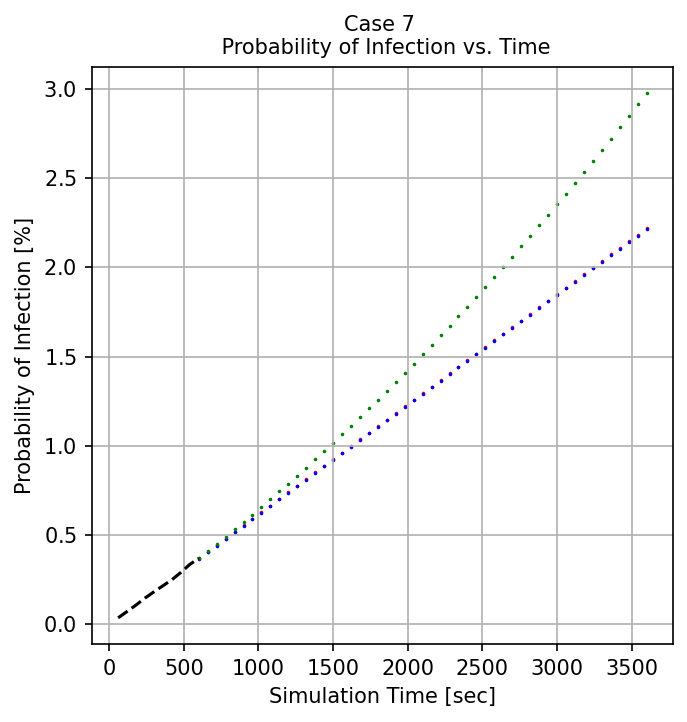

In [36]:
timepoints = 60*np.arange(11) -1
timepoints[0]+=1

# print(timepoints)

xvalues = []
yvalues = []

count=0
for i in timepoints:
    if count>0:
        xvalues.append(time[i])
        yvalues.append(P[i]*100)
    # print(time[i], P[i]*100)
    count+=1

xvalues = np.array(xvalues)
yvalues = np.array(yvalues)

# fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
# p = ax.plot(xvalues,yvalues,'k--',label='all')
# ax.scatter(xvalues,yvalues,c='r',marker='x')
# plt.ticklabel_format(style='sci',axis='y', useMathText=True)
# plt.xlabel('Simulation Time [sec]')
# plt.ylabel('Probability of Infection [%]')
# plt.title('Case 3 \n Probability of Infection vs. Time', fontsize=10)
# # plt.minorticks_on()
# plt.grid(which='major')
# # plt.grid(which='minor',linestyle=':')

extrapolated_x = np.arange(start=600,stop=3660,step=60)

#METHOD 1 - AVERAGES OF DELTA

delta_x = 60*np.ones(len(xvalues)-1)
delta_y = np.empty_like(delta_x)
for i in range(len(yvalues)-1):
    delta_y[i]=yvalues[i+1] - yvalues[i]

print('DELTA = ',delta_y)

init = yvalues[0]
average_dy = np.mean(delta_y)

def averages(time,average_dy,init):
    return init + average_dy*(time/60-1)

y1 = averages(extrapolated_x,average_dy,init)

#METHOD 2 - POLYFIT FUNCTION DEG 1

deg1series = np.polynomial.polynomial.Polynomial.fit(xvalues,yvalues,deg=1)
coeff = deg1series.convert().coef

def polyfitdeg1(time,coeff):
    return coeff[0]+coeff[1]*time

y2 = polyfitdeg1(extrapolated_x,coeff)

#METHOD 3 - POLYFIT FUNCTION DEG 2

deg2series = np.polynomial.polynomial.Polynomial.fit(xvalues,yvalues,deg=2)
coeff = deg2series.convert().coef

def polyfitdeg2(time,coeff):
    return coeff[0]+coeff[1]*time+coeff[2]*time**2

y3 = polyfitdeg2(extrapolated_x,coeff)


fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(xvalues,yvalues,'k--',label='Original Data')
# ax.plot(time,P*100,'k--')
# ax.scatter(xvalues,yvalues,c='r',marker='o',s=20,label='Original Data')
ax.scatter(extrapolated_x,y1,c='r',marker='.',s=2,label='Average of Delta')
ax.scatter(extrapolated_x,y2,c='b',marker='.',s=2, label='Linear Fit')
ax.scatter(extrapolated_x,y3,c='g',marker='.',s=2, label='Quadratic Fit')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [sec]')
plt.ylabel('Probability of Infection [%]')
plt.title('Case 7 \n Probability of Infection vs. Time', fontsize=10)
# plt.legend()
plt.grid(which='major')
plt.savefig('../Case7/Virions Inhaled Sampling/extrapolate.jpg')


In [146]:
histogram = []

histogram.append(0)

for i in range(1,60):
    histogram.append(N[i*10]-N[(i-1)*10])

In [148]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
plt.hist(histogram)

600 600


# Droplet Concentration Plot

In [11]:
time = 200
flag = 1

try:
    filename = foldername + str(time) + '.000000'
    file = open(filename, 'r')
    flag = 2
except:
    try:
        filename = foldername + str(time*10).zfill(4)
        file = open(filename, 'r')
        flag = 3
    except:
        print('File not found.')
        flag = 0

if flag:
    count=0
    for lines in file:
        count+=1

        if count==1:
            print(lines)
            if lines[10]==',':
                strings = lines.split(',')
                conc_index = strings.index('dpm-concentration,')
                xcoord_index = strings.index('x-coordinate,')
                ycoord_index = strings.index('y-coordinate,')
                zcoord_index = strings.index('z-coordinate,')
            elif lines[10]==' ': 
                strings = lines.split()
                conc_index = strings.index('dpm-concentration')
                xcoord_index = strings.index('x-coordinate')
                ycoord_index = strings.index('y-coordinate')
                zcoord_index = strings.index('z-coordinate')
            
            print(strings[conc_index] + ' found.')
            print('Good to go.')

nodenumber     x-coordinate     y-coordinate     z-coordinate         pressure dynamic-pressure absolute-pressure   total-pressure          density velocity-magnitude       x-velocity       y-velocity       z-velocity total-temperature dpm-concentration  dpm-mass-source num-virions-inhaled prob_infection-x100 prob_infection_1min-x100 

dpm-concentration found.
Good to go.


In [ ]:
xcoord = []
zcoord = []

dpmc = []